In [2]:
import pandas as pd
import numpy as np

In [3]:
data_model = pd.read_csv('match_data_bl_wo_nan_s_2022.csv')
data_betting = pd.read_csv('dataframe_with_odd_predictions_v2.csv')
data_betting.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Betting_Prediction,Betting_Prediction_Probability
0,0,0,0,D1,11/08/06,Bayern Munich,Dortmund,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,65.423011
1,1,1,1,D1,12/08/06,Hamburg,Bielefeld,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,71.593915
2,2,2,2,D1,12/08/06,Leverkusen,Aachen,3,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,68.510536
3,3,3,3,D1,12/08/06,Mainz,Bochum,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,51.671408
4,4,4,4,D1,12/08/06,M'gladbach,Cottbus,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,63.117820


In [39]:
data_model_reduced = data_model[['FTR', 'predictedResults', 'ProbAwayWin',
                                'ProbDraw', 'ProbHomeWin']]
data_model_reduced

,FTR,predictedResults,ProbAwayWin,ProbDraw,ProbHomeWin
0,1,0,0.503778,0.210859,0.285363
1,2,2,0.015976,0.036361,0.947663
2,2,0,0.860361,0.039739,0.099900
3,0,2,0.224459,0.236729,0.538812
4,2,2,0.152851,0.198737,0.648412
...,...,...,...,...,...
211,1,2,0.249225,0.287064,0.463711
212,2,2,0.163723,0.206911,0.629366
213,2,2,0.219194,0.367019,0.413787
214,2,2,0.273001,0.269522,0.457477


In [5]:
data_betting_reduced = data_betting[['Betting_Prediction', 'Betting_Prediction_Probability']]


In [6]:
def convert_ftr(result: str):
    if result == "D":
        return 1
    elif result == "H":
        return 2
    elif result == "A":
        return 0
    else:
        return None
data_betting_reduced['Betting_Prediction'] = data_betting_reduced['Betting_Prediction'].apply(convert_ftr)

C:\Users\I539022\AppData\Local\Temp/ipykernel_24696/2554507762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_betting_reduced['Betting_Prediction'] = data_betting_reduced['Betting_Prediction'].apply(convert_ftr)


In [46]:
data_betting_reduced = data_betting_reduced[-216:].reset_index()
data_betting_reduced

,level_0,index,Betting_Prediction,Betting_Prediction_Probability
0,0,4464,2,67.241379
1,1,4465,2,69.586168
2,2,4466,2,44.961240
3,3,4467,0,40.008003
4,4,4468,2,56.746032
...,...,...,...,...
211,211,4675,2,51.567413
212,212,4676,0,76.055523
213,213,4677,0,55.424380
214,214,4678,0,40.841337


In [41]:
def get_odd_prediction(data_model_reduced):
    erg_prob = []
    z = 0
    while z < len(data_model_reduced):
        if data_model_reduced['predictedResults'][z] == 0:
            erg_prob.append(data_model_reduced['ProbAwayWin'][z])
        if data_model_reduced['predictedResults'][z] == 1:
            erg_prob.append(data_model_reduced['ProbDraw'][z])
        if data_model_reduced['predictedResults'][z] == 2:
            erg_prob.append(data_model_reduced['ProbHomeWin'][z])
        z+=1
    return erg_prob


max_prob_model = get_odd_prediction(data_model_reduced)
data_model_reduced['Model_Prediction_Probability'] = max_prob_model

C:\Users\I539022\AppData\Local\Temp/ipykernel_24696/699377627.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model_reduced['Model_Prediction_Probability'] = max_prob_model


In [56]:
data_evaluation = data_model_reduced[[
    'FTR', 'predictedResults', 'Model_Prediction_Probability'
]].merge(data_betting_reduced[[
    'Betting_Prediction', 'Betting_Prediction_Probability'
]],
         how='inner',
         left_index=True,
         right_index=True)
data_evaluation

,FTR,predictedResults,Model_Prediction_Probability,Betting_Prediction,Betting_Prediction_Probability
0,1,0,0.503778,2,67.241379
1,2,2,0.947663,2,69.586168
2,2,0,0.860361,2,44.961240
3,0,2,0.538812,0,40.008003
4,2,2,0.648412,2,56.746032
...,...,...,...,...,...
211,1,2,0.463711,2,51.567413
212,2,2,0.629366,0,76.055523
213,2,2,0.413787,0,55.424380
214,2,2,0.457477,0,40.841337


In [62]:
def get_evaluation_score(data_evaluation):
    right_model, right_odds, right_home = 0, 0, 0
    right_model_list, right_odds_list, right_home_list = [], [], []
    z = 0
    while z < len(data_evaluation):
        if data_evaluation['FTR'][z] == data_evaluation['predictedResults'][z]:
            right_model +=1
        if data_evaluation['FTR'][z] == data_evaluation['Betting_Prediction'][
                z]:
            right_odds +=1
        if data_evaluation['FTR'][z] == 2:
            right_home +=1
        right_model_list.append(right_model)
        right_odds_list.append(right_odds)
        right_home_list.append(right_home)
        z += 1

    return right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list


right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list = get_evaluation_score(
    data_evaluation)


In [63]:
print('Accuracy Model: ', right_model / len(data_evaluation))
print('Accuracy Odds: ', right_odds / len(data_evaluation))
print('Accuracy Home: ', right_home / len(data_evaluation))

Accuracy Model:  0.4722222222222222
Accuracy Odds:  0.46296296296296297
Accuracy Home:  0.4583333333333333


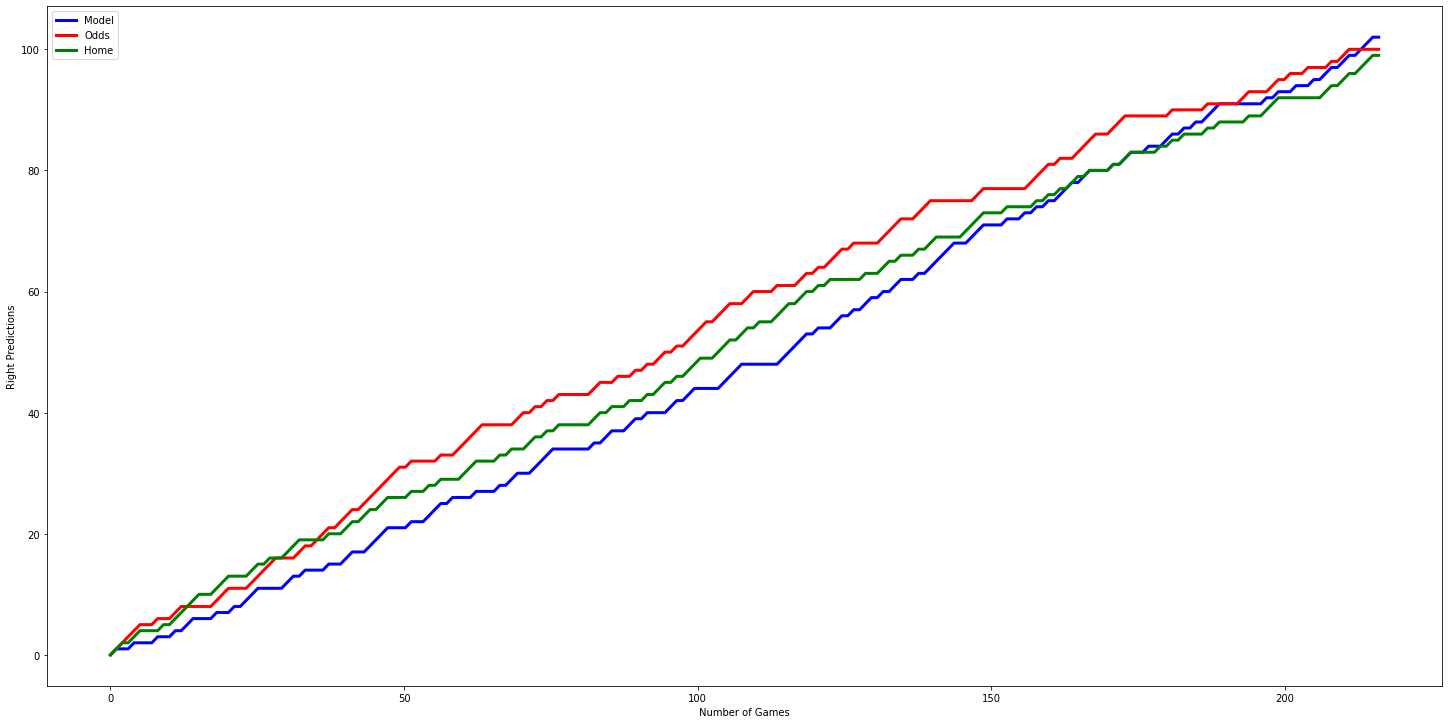

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 216, 216)
y1 = right_model_list
y2 = right_odds_list
y3 = right_home_list



plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Model')
plt.plot(x, y2, color='red', linewidth=3.0, label='Odds')
plt.plot(x, y3, color='green', linewidth=3.0, label='Home')

plt.xlabel("Number of Games")
plt.ylabel("Right Predictions")

plt.legend()
plt.show()

In [85]:
def prob_to_odds(data_evaluation):
    z, model_odds, betting_odds = 0, 0, 0
    model_odds_list, betting_odds_list = [], []
    while z < len(data_evaluation):
        model_odds = 1 / ((data_evaluation['Model_Prediction_Probability'][z]*100) / 100)
        model_odds_list.append(model_odds)

        betting_odds = 1 / ((data_evaluation['Betting_Prediction_Probability'][z]) / 100)
        betting_odds_list.append(betting_odds)
        z+=1
    data_evaluation['Model_Odds'] = model_odds_list
    data_evaluation['Betting_Odds'] = betting_odds_list


prob_to_odds(data_evaluation)

In [86]:
data_evaluation.head()

,FTR,predictedResults,Model_Prediction_Probability,Betting_Prediction,Betting_Prediction_Probability,Model_Odds,Betting Odds,Betting_Odds
0,1,0,0.503778,2,67.241379,1.985001,1.487179,1.487179
1,2,2,0.947663,2,69.586168,1.055228,1.437067,1.437067
2,2,0,0.860361,2,44.961240,1.162303,2.224138,2.224138
3,0,2,0.538812,0,40.008003,1.855934,2.499500,2.499500
4,2,2,0.648412,2,56.746032,1.542229,1.762238,1.762238


In [83]:
def betting_with_the_model(data_evaluation):
    z, model_bank = 0, 1000
    bank_model_list = []
    while z < len(data_evaluation):
        if data_evaluation['Model_Prediction_Probability'][z]*100 <= 40:
            model_bank = model_bank - 2
            if data_evaluation['predictedResults'][z] == data_evaluation['FTR'][z]:
                model_bank = model_bank + 2 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 <= 60:
            model_bank = model_bank - 5
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 5 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 <= 80:
            model_bank = model_bank - 7
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 7 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 > 80:
            model_bank = model_bank - 10
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 10 * data_evaluation['Model_Odds'][z]
        else:
            print('Fehler!')
        bank_model_list.append(model_bank)
        z += 1
    return bank_model_list


bank_model_list = betting_with_the_model(data_evaluation)
bank_model_list

[995,
 995.5522762774182,
 985.5522762774182,
 980.5522762774182,
 984.3478815407384,
 982.3478815407384,
 977.3478815407384,
 972.3478815407384,
 973.0488869633338,
 963.0488869633338,
 956.0488869633338,
 957.5836182584231,
 952.5836182584231,
 955.1319643034695,
 957.7701588713555,
 952.7701588713555,
 947.7701588713555,
 940.7701588713555,
 946.9818161247148,
 936.9818161247148,
 931.9818161247148,
 932.689910953975,
 927.689910953975,
 931.603749081527,
 931.8578760856576,
 936.4155939251107,
 931.4155939251107,
 924.4155939251107,
 919.4155939251107,
 912.4155939251107,
 919.4522300752938,
 920.7900552357577,
 915.7900552357577,
 920.4040097754046,
 915.4040097754046,
 908.4040097754046,
 906.4040097754046,
 906.873601317901,
 896.873601317901,
 894.873601317901,
 900.1403823921004,
 904.0666488244246,
 899.0666488244246,
 889.0666488244246,
 894.4335178039951,
 896.3792692795641,
 902.9805505065008,
 905.994034648111,
 898.994034648111,
 893.994034648111,
 886.994034648111,
 887

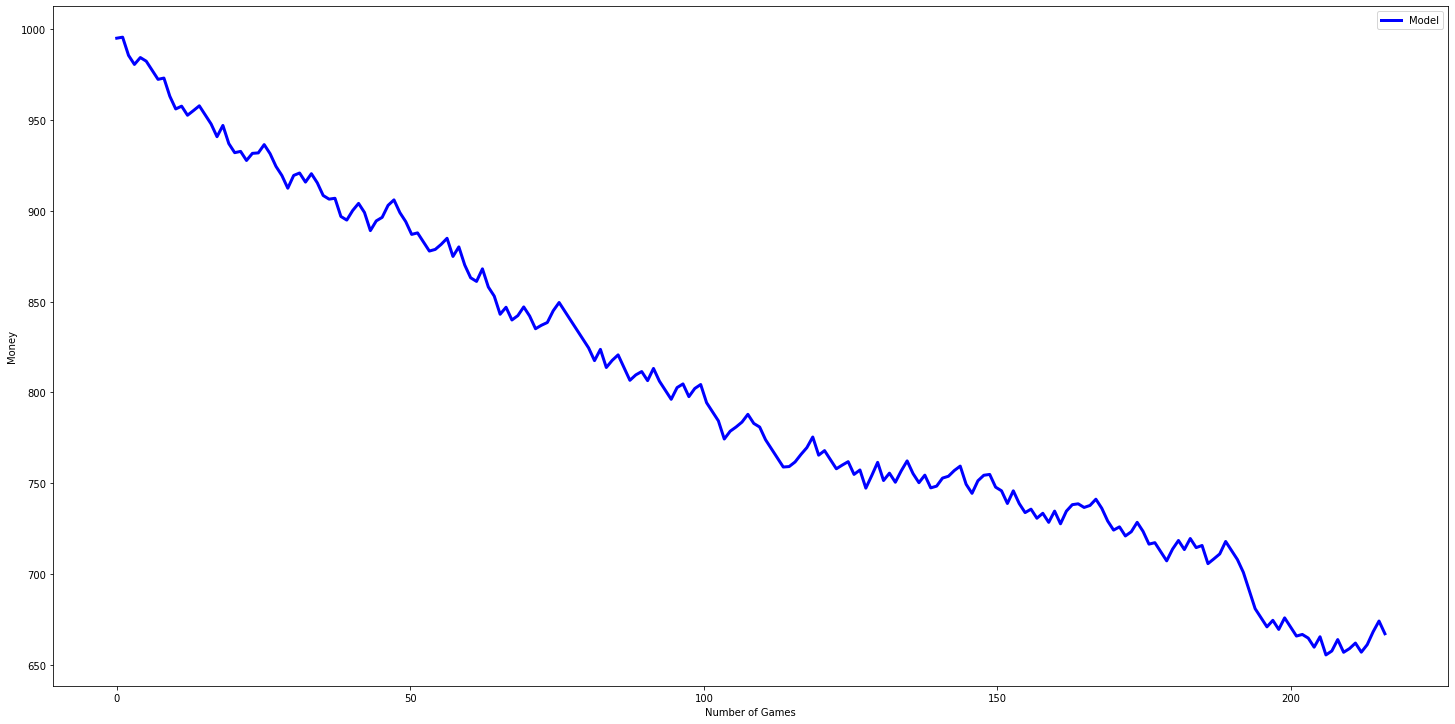

In [84]:
x = np.linspace(0, 216, 216)
y1 = bank_model_list

plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Model')

plt.xlabel("Number of Games")
plt.ylabel("Money")

plt.legend()
plt.show()

In [87]:
def betting_with_the_odds(data_evaluation):
    z, odds_bank = 0, 1000
    bank_odds_list = []
    while z < len(data_evaluation):
        if data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 40:
            odds_bank = odds_bank - 2
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 2 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 60:
            odds_bank = odds_bank - 5
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 5 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 80:
            odds_bank = odds_bank - 7
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 7 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 > 80:
            odds_bank = odds_bank - 10
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 10 * data_evaluation['Betting_Odds'][z]
        else:
            print('Fehler!')
        bank_odds_list.append(odds_bank)
        z += 1
    return bank_odds_list


bank_odds_list = betting_with_the_odds(data_evaluation)
bank_odds_list

[990,
 994.3706720977597,
 1006.6120514081044,
 1021.6070504079044,
 1029.229428030282,
 1033.9263804329757,
 1023.9263804329757,
 1013.9263804329757,
 1020.6700800518795,
 1010.6700800518795,
 1000.6700800518795,
 1014.8661466176889,
 1021.3850072093398,
 1011.3850072093398,
 1001.3850072093398,
 991.3850072093398,
 981.3850072093398,
 971.3850072093398,
 973.1828884283055,
 975.0820480921711,
 980.1200311374205,
 970.1200311374205,
 960.1200311374205,
 950.1200311374205,
 960.6139317622345,
 968.8871803847467,
 979.7363589984337,
 988.93057991008,
 995.5551653521692,
 985.5551653521692,
 975.5551653521692,
 965.5551653521692,
 972.0551653521692,
 987.7930257675464,
 977.7930257675464,
 990.5292841925434,
 999.1518007488348,
 1015.2701692334581,
 1005.2701692334581,
 1007.8446242775418,
 1011.2191118187122,
 1016.1686067682072,
 1006.1686067682072,
 1014.1686067682072,
 1028.5416637630258,
 1032.0899866628918,
 1034.3123944104289,
 1042.711850932168,
 1046.9086965123124,
 1055.2313935

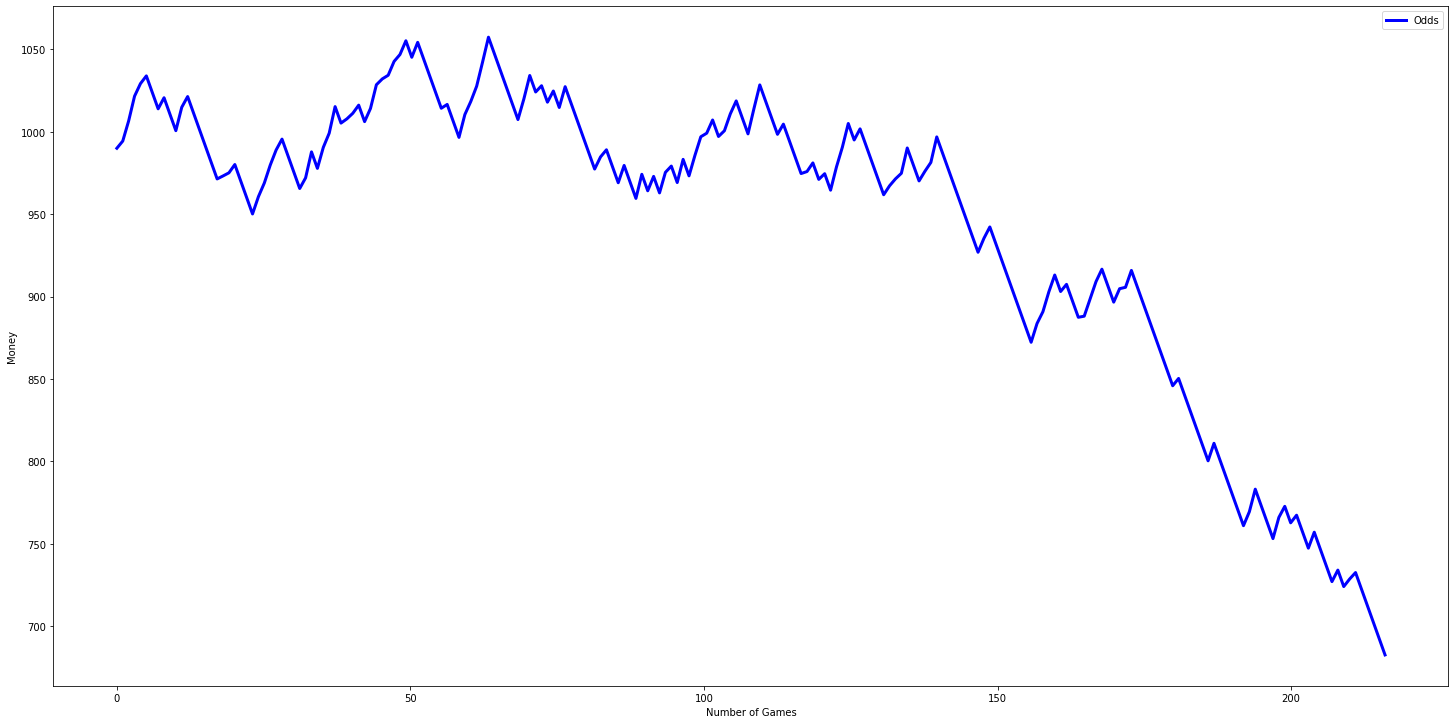

In [88]:
x = np.linspace(0, 216, 216)
y1 = bank_odds_list

plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Odds')

plt.xlabel("Number of Games")
plt.ylabel("Money")

plt.legend()
plt.show()